<a href="https://colab.research.google.com/github/dmassoo/ANLP/blob/main/ANLP_lab1_Dmitrii_Vorotnikov_J41321c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
all_docs_df = pd.read_csv('/content/drive/MyDrive/ANLP/web_sites_data.csv')

In [4]:
all_docs_df.head()

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."


In [85]:
df = all_docs_df.loc[:1000]

#### Data processing

In [86]:
import nltk
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
from bs4 import BeautifulSoup
def remove_tags(html):
    # parse html content
    soup = BeautifulSoup(html, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

In [117]:
from nltk.corpus import stopwords
import re
stopwords = set(stopwords.words('english'))
def get_lemmatized_english_text(text):
    pattern = re.compile("^[a-zA-Z]+$")
    lemmatizer = WordNetLemmatizer()
    a = []
    tokens = word_tokenize(text)
    for token in tokens:
         lemmatized_word = lemmatizer.lemmatize(token.lower())
         # in assumption that corpus contains all words in dictionary form 
         if pattern.match(lemmatized_word) and lemmatized_word not in stopwords:
             a.append(lemmatized_word)
    text = " ".join(a)
    return text

In [118]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("books")

'book'

In [119]:
def clean_doc(text):
    no_html = remove_tags(text)
    return get_lemmatized_english_text(no_html)

In [120]:
test_df = df.loc[0:2]

In [121]:
test_df = test_df.applymap(clean_doc)

In [122]:
test_df

,text
0,eric newby love war apennines eric newby love ...
1,eric newby short walk hindu kush eric newby sh...
2,william wordsworth poetry wordsworth unabridge...


In [123]:
df = df.applymap(clean_doc)

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [124]:
all_terms = ' '.join(df["text"]).split()

from collections import Counter
Counter = Counter(all_terms)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(100)
  
print(most_occur)

[('book', 11268), ('kindle', 5738), ('review', 5171), ('amazon', 4614), ('star', 4481), ('game', 4009), ('publisher', 3893), ('customer', 3886), ('video', 3396), ('u', 3323), ('free', 3079), ('new', 2996), ('cloud', 2993), ('item', 2945), ('product', 2924), ('home', 2875), ('audio', 2728), ('help', 2687), ('music', 2609), ('see', 2474), ('edition', 2424), ('paperback', 2391), ('list', 2333), ('read', 2313), ('page', 2211), ('movie', 2206), ('feedback', 2154), ('tv', 2143), ('apps', 2136), ('search', 2078), ('date', 2044), ('store', 2018), ('show', 1944), ('history', 1935), ('accessory', 1908), ('prime', 1884), ('wa', 1832), ('like', 1799), ('author', 1786), ('fire', 1724), ('player', 1710), ('instant', 1702), ('published', 1617), ('sport', 1594), ('gift', 1579), ('wish', 1545), ('shop', 1523), ('android', 1520), ('science', 1515), ('baby', 1512), ('drive', 1511), ('shipping', 1510), ('detail', 1499), ('library', 1492), ('get', 1488), ('software', 1488), ('clothing', 1484), ('health', 1

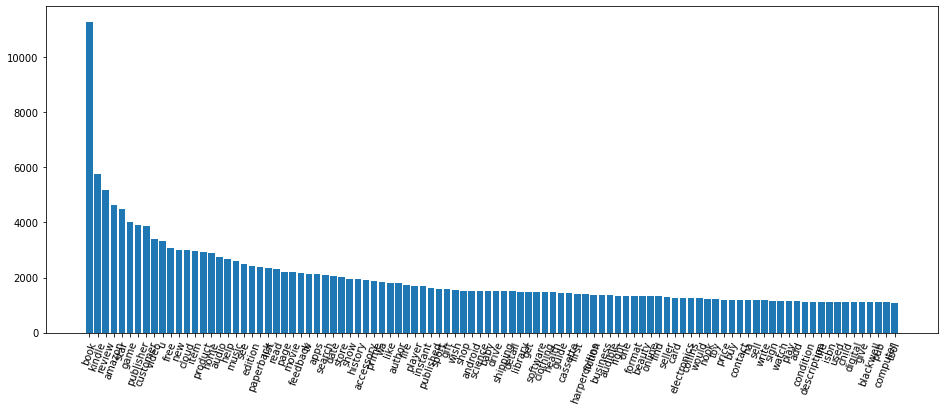

In [125]:
# word freq vs word
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.bar(range(len(most_occur)), [val[1] for val in most_occur], align='center')
plt.xticks(range(len(most_occur)), [val[0] for val in most_occur])
plt.xticks(rotation=70)
plt.show()

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [126]:
df.loc[0][:250]

text    eric newby love war apennines eric newby love ...
Name: 0, dtype: object

In [127]:
df.loc[100][:250]

text    bible bible nrsv bible bible nrsv author title...
Name: 100, dtype: object

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [128]:
pip install datasketch

In [129]:
type(df["text"])

pandas.core.series.Series

In [130]:
def get_shingles(text, char_ngram=5):
    return set(text[head:head + char_ngram] for head in range(0, len(text) - char_ngram))

In [131]:
# useful code snippet from lib documentation page
from datasketch import MinHash, MinHashLSH

set1 = set(['minhash', 'is', 'a', 'probabilistic', 'data', 'structure', 'for',
            'estimating', 'the', 'similarity', 'between', 'datasets'])
set2 = set(['minhash', 'is', 'a', 'probability', 'data', 'structure', 'for',
            'estimating', 'the', 'similarity', 'between', 'documents'])
set3 = set(['minhash', 'is', 'probability', 'data', 'structure', 'for',
            'estimating', 'the', 'similarity', 'between', 'documents'])

m1 = MinHash(num_perm=128)
m2 = MinHash(num_perm=128)
m3 = MinHash(num_perm=128)
for d in set1:
    m1.update(d.encode('utf8'))
for d in set2:
    m2.update(d.encode('utf8'))
for d in set3:
    m3.update(d.encode('utf8'))

# Create LSH index
lsh = MinHashLSH(threshold=0.5, num_perm=128)
lsh.insert("m2", m2)
lsh.insert("m3", m3)
result = lsh.query(m1)
print("Approximate neighbours with Jaccard similarity > 0.5", result)

Approximate neighbours with Jaccard similarity > 0.5 ['m3', 'm2']


In [132]:
def calc_min_hash(document, num_perm, char_ngrams):
    mh = MinHash(num_perm)
    for s in get_shingles(document, char_ngrams):
        mh.update(s.encode('utf8'))
    return mh

In [133]:
calc_min_hash(df.loc[2]['text'], 128, 5)

In [136]:
def create_lsh(texts:pd.Series, num_perm, char_ngrams):
    lsh = MinHashLSH(threshold=0.5, num_perm=num_perm)
    mhs = []
    for i, text in enumerate(texts):
        mh = calc_min_hash(text, num_perm, char_ngrams)
        mhs.append(mh)
        lsh.insert(str(i), mh)
    print(f"Lsh with number of permutations = {num_perm} and shingle size = {char_ngrams} is created")
    return mhs, lsh

In [137]:
mhs, lsh = create_lsh(df.loc[0:5]['text'], 128, 5)

Lsh with number of permutations = 128 and shingle size = 5 is created


In [138]:
lsh.query(mhs[0])

['0']

In [141]:
def find_duplicates(texts:pd.Series, num_perm=128, char_ngrams=5):
    mhs, lsh = create_lsh(texts, num_perm, char_ngrams)
    n_dups = 0
    for mh in mhs:
        dups_list_size = len(lsh.query(mh)) - 1
        if dups_list_size > 0:
            n_dups += dups_list_size
    print(f"Number of duplicates when number of permutations = {num_perm} and shingle size = {char_ngrams} is approximately equal to {n_dups}")
    return n_dups

In [142]:
# number of duplicates vs shingle size when number of permutations is 128
shingle_range = range(2, 12)
x_vals = list(shingle_range)
y_vals = []
for i in shingle_range:
    y_vals.append(find_duplicates(df['text'], char_ngrams=i))

Lsh with number of permutations = 128 and shingle size = 2 is created
Number of duplicates when number of permutations = 128 and shingle size = 2 is approximately equal to 943276
Lsh with number of permutations = 128 and shingle size = 3 is created
Number of duplicates when number of permutations = 128 and shingle size = 3 is approximately equal to 244114
Lsh with number of permutations = 128 and shingle size = 4 is created
Number of duplicates when number of permutations = 128 and shingle size = 4 is approximately equal to 133744
Lsh with number of permutations = 128 and shingle size = 5 is created
Number of duplicates when number of permutations = 128 and shingle size = 5 is approximately equal to 128340
Lsh with number of permutations = 128 and shingle size = 6 is created
Number of duplicates when number of permutations = 128 and shingle size = 6 is approximately equal to 147498
Lsh with number of permutations = 128 and shingle size = 7 is created
Number of duplicates when number of

In [143]:
y_vals

[943276, 244114, 133744, 128340, 147498, 116716, 104158, 112152, 107938, 66448]

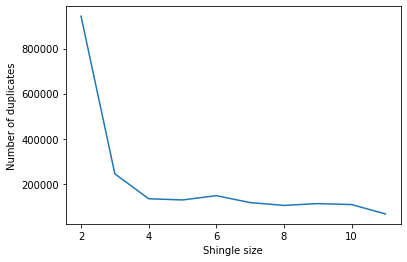

In [147]:
import matplotlib.pyplot as plt
plt.plot(x_vals, y_vals)
plt.ylabel('Number of duplicates')
plt.xlabel('Shingle size')
plt.show()

It is expected dependency, since with longer shingles the probability of false positives decreases obviously. However, with value > 4-5 there is no major difference. And it is consistent with heuristics some experts provide, namely, 5 for small texts (our htmls are quite small) and 10 for bigger documents such as research papers etc. 

In [144]:
# number of duplicates vs number of permutations when shingle size is 5
perm_range = range(64, 512, 64)
x_vals1 = list(perm_range)
y_vals1 = []
for i in perm_range:
    y_vals1.append(find_duplicates(df['text'], num_perm=i))

Lsh with number of permutations = 64 and shingle size = 5 is created
Number of duplicates when number of permutations = 64 and shingle size = 5 is approximately equal to 126796
Lsh with number of permutations = 128 and shingle size = 5 is created
Number of duplicates when number of permutations = 128 and shingle size = 5 is approximately equal to 128340
Lsh with number of permutations = 192 and shingle size = 5 is created
Number of duplicates when number of permutations = 192 and shingle size = 5 is approximately equal to 99588
Lsh with number of permutations = 256 and shingle size = 5 is created
Number of duplicates when number of permutations = 256 and shingle size = 5 is approximately equal to 110568
Lsh with number of permutations = 320 and shingle size = 5 is created
Number of duplicates when number of permutations = 320 and shingle size = 5 is approximately equal to 117892
Lsh with number of permutations = 384 and shingle size = 5 is created
Number of duplicates when number of pe

In [145]:
y_vals1

[126796, 128340, 99588, 110568, 117892, 118436, 101832]

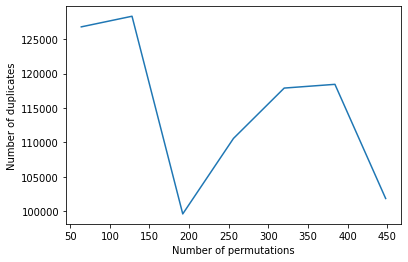

In [148]:
plt.plot(x_vals1, y_vals1)
plt.ylabel('Number of duplicates')
plt.xlabel('Number of permutations')
plt.show()

This dependency is interesting, particularly, this outlier at 192. The main idea here that with bigger N we are more confident that documents are duplicates. And with bigger number of duplicates should decrease. In general, we observe downward trend, but range ~ (150, 250) looks optimal since it gives less duplicates (I think at cost of only false positives) with lower computational resources.

# NB: there is just a draft for now. Probably, I'll implement the rest of part 3 later...

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

In [158]:
df2 = pd.read_csv('/content/drive/MyDrive/ANLP/data.csv')

The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

In [152]:
df2.shape

(19579, 3)

In [155]:
df2.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [159]:
df2['text'] = df2['text'].apply(clean_doc)

In [160]:
df2.head()

,id,text,author
0,id26305,process however afforded mean ascertaining dim...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand wa gold snuff box capered hill cutti...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL


#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

In [ ]:
import sklearn.metrics.normalized_mutual_info_score as n_PMI


### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X = df2['text']
y = df2['author']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [166]:
def top_k(series: pd.Series, k=100):
    from collections import Counter
    terms = ' '.join(series).split()
    counter = Counter(terms)
    return counter.most_common(k)


In [167]:
train_freq = top_k(X_train)
test_freq = top_k(X_test)

Plot the histogram of resulting tokens counts in the processed datasets.

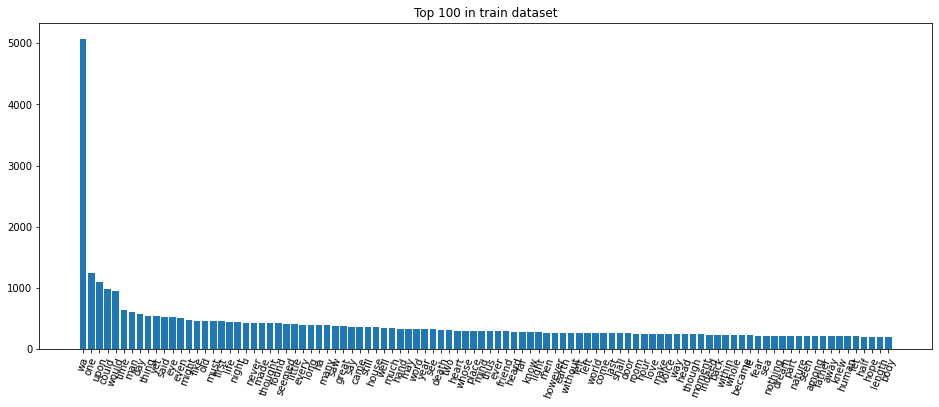

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.bar(range(len(train_freq)), [val[1] for val in train_freq], align='center')
plt.xticks(range(len(train_freq)), [val[0] for val in train_freq])
plt.xticks(rotation=70)
plt.title("Top 100 in train dataset")
plt.show()

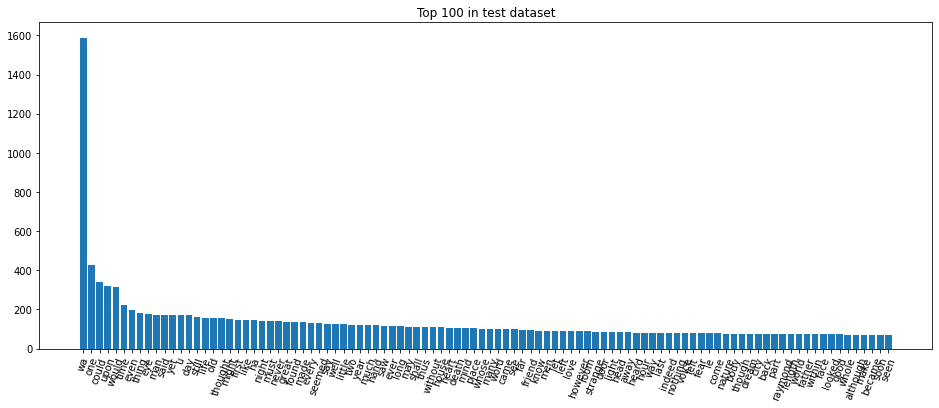

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.bar(range(len(test_freq)), [val[1] for val in test_freq], align='center')
plt.xticks(range(len(test_freq)), [val[0] for val in test_freq])
plt.xticks(rotation=70)
plt.title("Top 100 in test dataset")
plt.show()

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [171]:
from sklearn.decomposition import NMF

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [172]:
from sklearn.decomposition import LatentDirichletAllocation

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.